
t-Distributed Stochastic Neighbor Embedding (t-SNE)  
It is a non-linear technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. 
The algorithms starts by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space. The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian (normal distribution) centered at A.
It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.
To measure the minimization of the sum of difference of conditional probability t-SNE minimizes the sum of Kullback-Leibler divergence of overall data points using a gradient descent method.


Starting compute t-SNE Embedding...


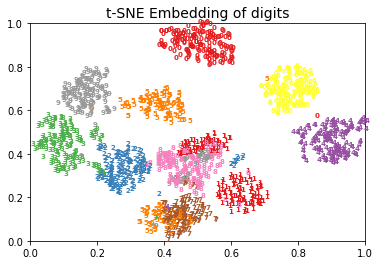

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE


#load handwriting digits
def get_data():

	digits = datasets.load_digits(n_class=10)
	data = digits.data #features
	label = digits.target
	n_samples, n_features = data.shape
	return data, label, n_samples, n_features


def plot_embedding(data, label, title):
	"""
	:param data
	:param label
	:param title
	:return
	"""
	x_min, x_max = np.min(data, 0), np.max(data, 0)
	data = (data - x_min) / (x_max - x_min)
	fig = plt.figure()
	ax = plt.subplot(111)
	for i in range(data.shape[0]):
		# plot tag for every data point in fig
		plt.text(data[i, 0], data[i, 1], str(label[i]), color=plt.cm.Set1(label[i] / 10),
				 fontdict={'weight': 'bold', 'size': 7})
	plt.xticks()
	plt.yticks()
	plt.title(title, fontsize=14)
	return fig


# t-sne
def main():
	data, label , n_samples, n_features = get_data()
	print('Starting compute t-SNE Embedding...')
	ts = TSNE(n_components=3, init='pca', random_state=0)
	reslut = ts.fit_transform(data)
	fig = plot_embedding(reslut, label, 't-SNE Embedding of digits')
	plt.show()



if __name__ == '__main__':
	main()


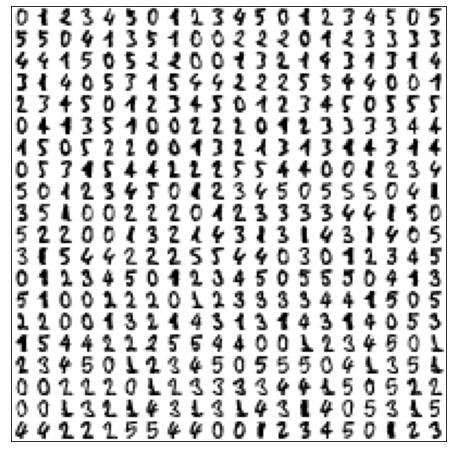

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

'''显示原始数据'''
n = 20  # 每行20个数字，每列20个数字
img = np.zeros((10 * n, 10 * n))
for i in range(n):
    ix = 10 * i + 1
    for j in range(n):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n + j].reshape((8, 8))
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
len(X[0])

64

Org data dimension is 64. Embedded data dimension is 3


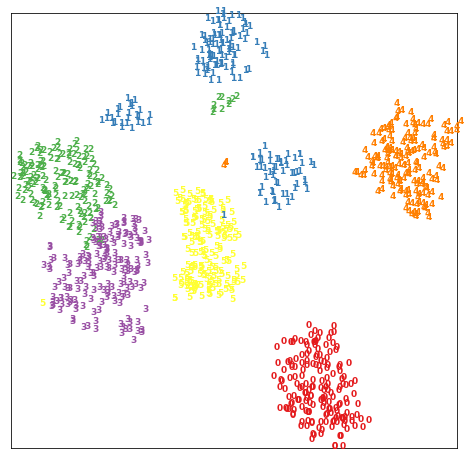

In [6]:
'''t-SNE'''
tsne = manifold.TSNE(n_components=3, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)

print("Org data dimension is {}. 
      Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

Org data dimension is 64. Embedded data dimension is 2


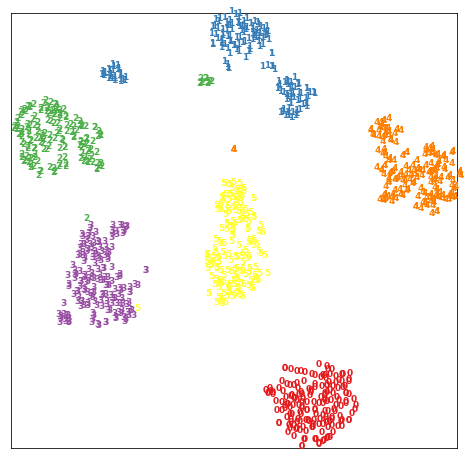

In [8]:
'''t-SNE'''
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)

print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

PCA vs. t-SNE
Although both PCA and t-SNE have their own advantages and disadvantages, some key differences between PCA and t-SNE can be noted as follows:

t-SNE is computationally expensive and can take several hours on million-sample datasets where PCA will finish in seconds or minutes.
PCA it is a mathematical technique, but t-SNE is a probabilistic one.
Linear dimensionality reduction algorithms, like PCA, concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is essential that similar data points must be represented close together, which is something t-SNE does not PCA.
Sometimes in t-SNE different runs with the same hyperparameters may produce different results hence multiple plots must be observed before making any assessment with t-SNE, while this is not the case with PCA.
Since PCA is a linear algorithm, it will not be able to interpret the complex polynomial relationship between features while t-SNE is made to capture exactly that.